In [118]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [119]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [120]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [121]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [122]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [123]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [124]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [125]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [126]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

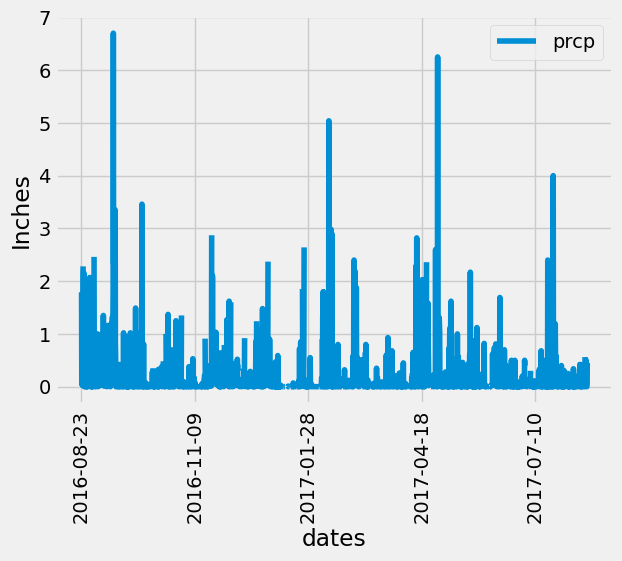

In [127]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

query_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_result_df = pd.DataFrame(query_result,columns=["dates","prcp"])

# Sort the dataframe by date
query_result_df = query_result_df.sort_values("dates")
query_result_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
query_result_df.plot(x="dates",y="prcp",rot=90)
plt.ylabel("Inches")
plt.show()

In [128]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stat_prcp =query_result_df.describe()
print(summary_stat_prcp)


              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [129]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [130]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [131]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_calc = most_active_stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == active_station_calc).all()

[(54.0, 85.0, 71.66378066378067)]

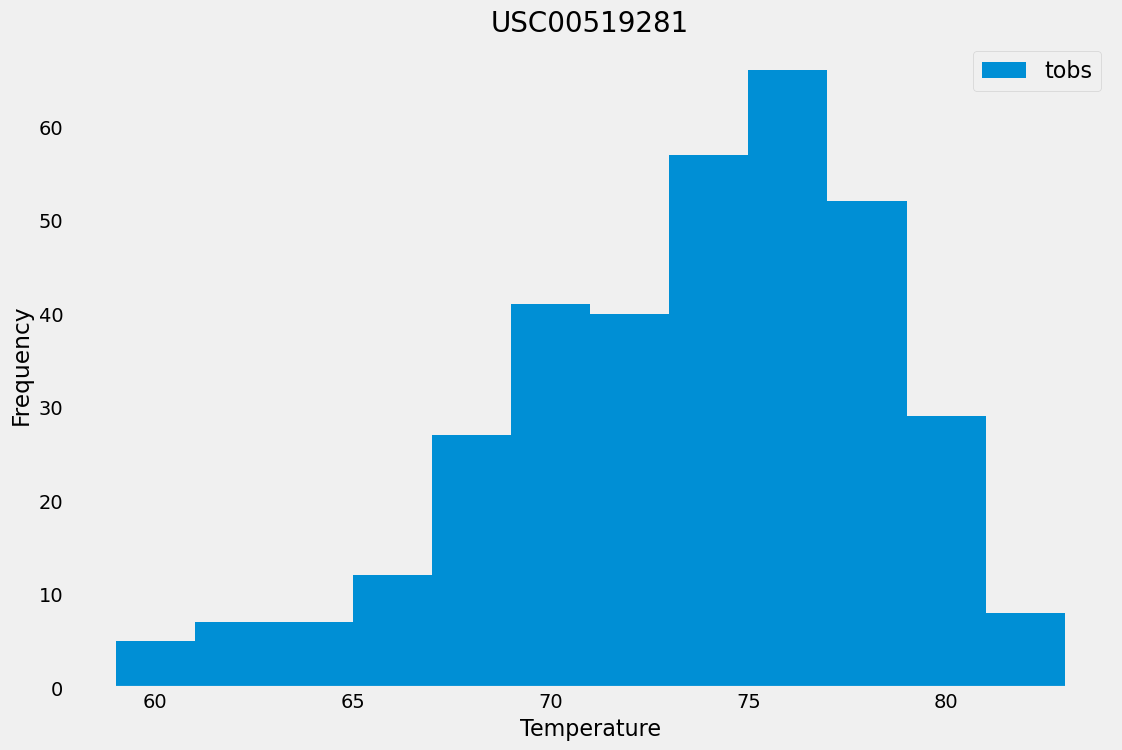

In [132]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

temp_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == active_station_calc).\
filter(Measurement.date >= last_twelve_months).all()

chart_df = pd.DataFrame(temp_data)

chart_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title(active_station_calc, fontsize=20)
plt.xlabel("Temperature", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show()


# Close Session

In [134]:
# Close Session
session.close()